In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt

In [4]:
# Load the CSV file
file_path = 'life_expectancy.csv'  
df = pd.read_csv(file_path)

### Finds the top ten countries with the highest female and male life expectancy 

In [5]:
# Group by country
grouped_by_country = df.groupby('Country')

# Dictionary to store the maximum female life expectancy for each country
max_female_life_expectancy = {}

# Iterate over each group (country) to find the maximum female life expectancy
for country, data in grouped_by_country:
    max_female_life_expectancy[country] = data['Female Life Expectancy'].max()

# Convert the dictionary to a DataFrame
grouped_df = pd.DataFrame(list(max_female_life_expectancy.items()), columns=['Country', 'Max Female Life Expectancy'])

# Sort the DataFrame by maximum female life expectancy in descending order
sorted_df = grouped_df.sort_values(by='Max Female Life Expectancy', ascending=False)

# Select the top ten countries with the highest female life expectancy
top_ten_countries = sorted_df.head(10)

# Print the top ten countries with their maximum female life expectancy
print("Top Ten Countries with the Highest Female Life Expectancy of All Time:")
print(top_ten_countries)


Top Ten Countries with the Highest Female Life Expectancy of All Time:
           Country  Max Female Life Expectancy
145         Monaco                        88.7
100      Hong Kong                        88.3
130          Macao                        87.9
112          Japan                        87.7
208    South Korea                        86.8
6          Andorra                        86.8
87       Gibraltar                        86.3
210          Spain                        86.2
136          Malta                        86.2
127  Liechtenstein                        86.0


/var/folders/25/k80xgfp945v9hr0_xm4s6h2c0000gn/T/ipykernel_65087/3364429207.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


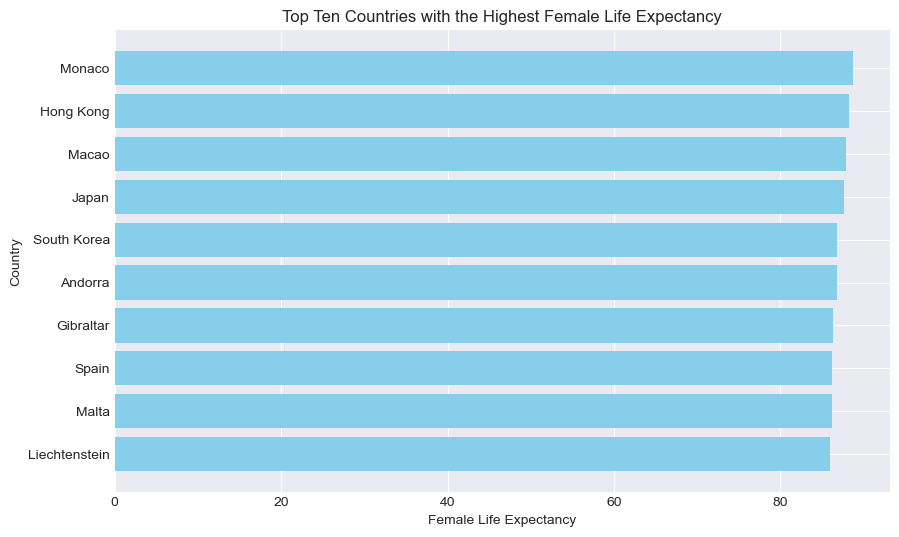

In [6]:
# Set the style of the plot
plt.style.use('seaborn-darkgrid')

# Extract country names and corresponding life expectancies
countries = top_ten_countries['Country']
life_expectancies = top_ten_countries['Max Female Life Expectancy']

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(countries, life_expectancies, color='skyblue')

# Add labels and title
plt.xlabel('Female Life Expectancy')
plt.ylabel('Country')
plt.title('Top Ten Countries with the Highest Female Life Expectancy')

# Display the plot
plt.gca().invert_yaxis()  
plt.show()




In [7]:
# Empty dictionary to store the maximum male life expectancy for each country
max_male_life_expectancy = {}

# Iterate over each group (country) to find the maximum female life expectancy
for country, data in grouped_by_country:
    # Find the maximum emale life expectancy for the current country
    max_male_life_expectancy[country] = data['Male Life Expectancy'].max()

# Convert the dictionary to a DataFrame
grouped_df = pd.DataFrame(max_male_life_expectancy.items(), columns=['Country', 'Male Life Expectancy'])

# Sort the DataFrame by maximum male life expectancy in descending order
sorted_df = grouped_df.sort_values(by='Male Life Expectancy', ascending=False)

# Select the top ten countries with the highest male life expectancy
top_ten_countries = sorted_df.head(10)

# Print the top ten countries with their maximum male life expectancy
print("Top Ten Countries with the Highest Male Life Expectancy of All Time:")
print(top_ten_countries)


Top Ten Countries with the Highest Male Life Expectancy of All Time:
           Country  Male Life Expectancy
145         Monaco                  84.8
14       Australia                  83.2
130          Macao                  82.8
100      Hong Kong                  82.7
127  Liechtenstein                  82.6
215    Switzerland                  82.0
6          Andorra                  81.8
112          Japan                  81.8
200      Singapore                  81.6
193     San Marino                  81.6


/var/folders/25/k80xgfp945v9hr0_xm4s6h2c0000gn/T/ipykernel_65087/3338110976.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


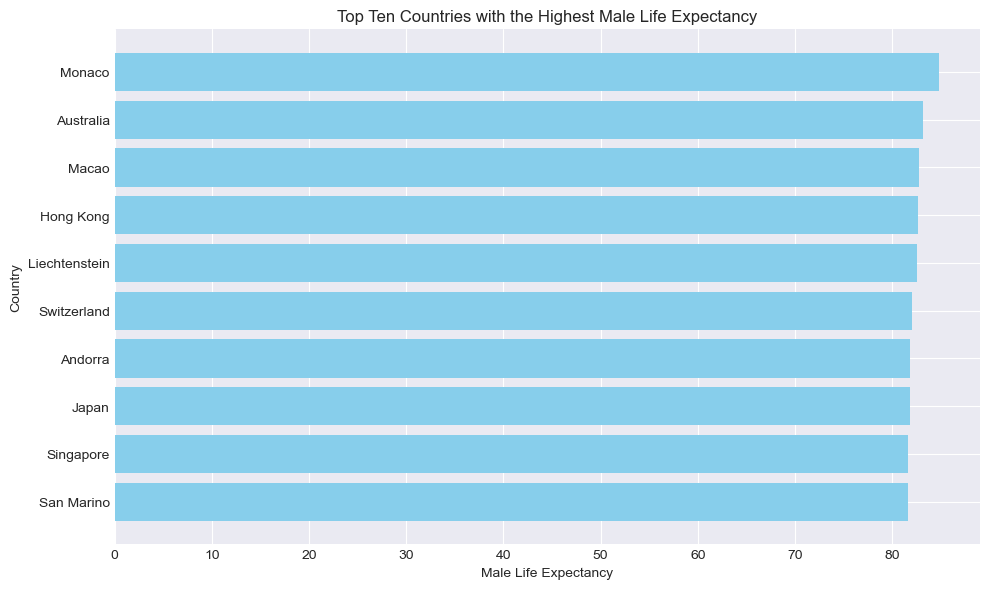

In [8]:
# Set the style of the plot
plt.style.use('seaborn-darkgrid')

# Extract country names and corresponding life expectancies
countries = top_ten_countries['Country']
life_expectancies = top_ten_countries['Male Life Expectancy']

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(countries, life_expectancies, color='skyblue')

# Add labels and title
plt.xlabel('Male Life Expectancy')
plt.ylabel('Country')
plt.title('Top Ten Countries with the Highest Male Life Expectancy')

# Display the plot
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()


## Allows user to compare life expectancy between countries 

Enter country 1 (or press Enter again to finish): Japan
Enter country 2 (or press Enter again to finish): India
Enter country 3 (or press Enter again to finish): 
Choose the genders to compare:
1. Male vs. Male
2. Female vs. Male
3. Female vs. Female
Enter the number that corresponds to your choice: 2


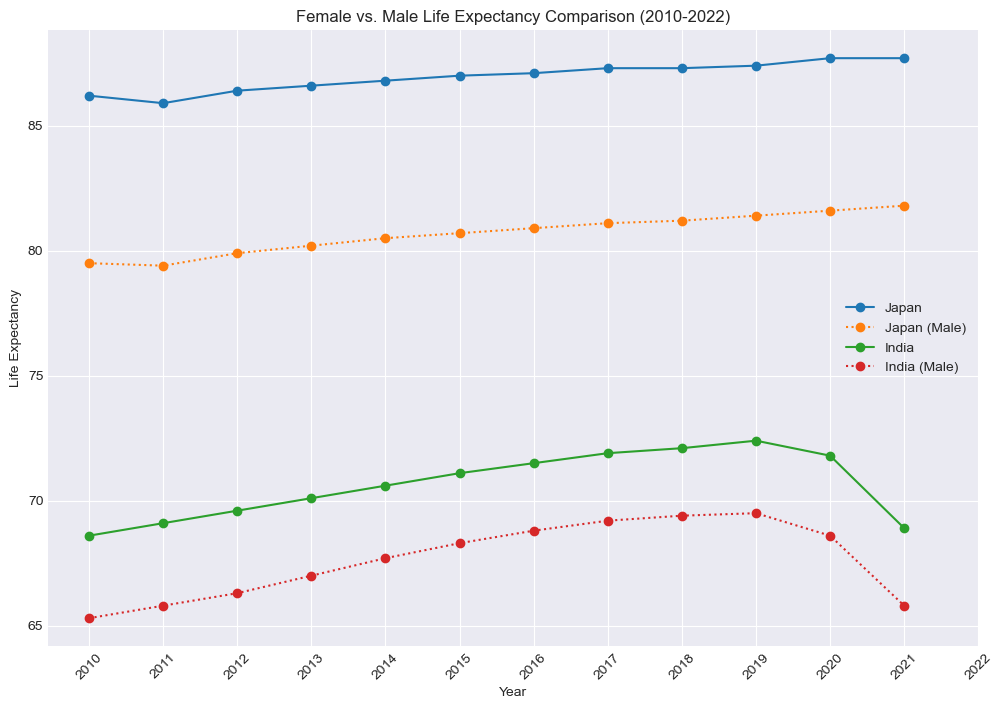

In [9]:
# Initialize a list to store the selected countries
countries = []

# Ask the user to enter up to 5 countries for comparison
i = 1
while i <= 5:
    country = input(f"Enter country {i} (or press Enter again to finish): ").strip()
    if country:
        countries.append(country)
        i += 1
    else:
        break

# Ask the user to choose the type of comparison
print("Choose the genders to compare:")
print("1. Male vs. Male")
print("2. Female vs. Male")
print("3. Female vs. Female")
comparison_type = input("Enter the number that corresponds to your choice: ")

# Filter the DataFrame for the specified countries and years 2010-2022
filtered_data = df[(df['Country'].isin(countries)) & (df['Year'] >= 2010) & (df['Year'] <= 2022)]

# Check if data is available for the specified countries
if filtered_data.empty:
    print("No data available for the specified countries or years.")
else:
    # Create a line chart based on the user's chosen comparison type
    plt.figure(figsize=(12, 8))

    for country in countries:
        country_data = filtered_data[filtered_data['Country'] == country]
        if comparison_type == '1':
            plt.plot(country_data['Year'], country_data['Male Life Expectancy'], marker='o', label=country)
        elif comparison_type == '2':
            plt.plot(country_data['Year'], country_data['Female Life Expectancy'], marker='o', label=country)
            plt.plot(country_data['Year'], country_data['Male Life Expectancy'], marker='o', linestyle='dotted', label=f"{country} (Male)")
        elif comparison_type == '3':
            plt.plot(country_data['Year'], country_data['Female Life Expectancy'], marker='o', label=country)
    
    # Set plot title and labels
    if comparison_type == '1':
        plt.title("Male Life Expectancy Comparison (2010-2022)")
        plt.ylabel("Male Life Expectancy")
    elif comparison_type == '2':
        plt.title("Female vs. Male Life Expectancy Comparison (2010-2022)")
        plt.ylabel("Life Expectancy")
    elif comparison_type == '3':
        plt.title("Female Life Expectancy Comparison (2010-2022)")
        plt.ylabel("Female Life Expectancy")
    
    plt.xlabel("Year")
    plt.grid(True)
    plt.xticks(range(2010, 2023), rotation=45)
    plt.legend()
    plt.show()


## Allows user to insert the country they want the average life expectancy for

In [10]:
# Prompt the user to select countries to display their average life expectancies
selected_countries = input("Enter country to display their average life expectancies: ").split(',')

# Filter the DataFrame for selected countries
filtered_data = df[df['Country'].isin(selected_countries)]

# Display average life expectancies for selected countries
for country in selected_countries:
    country_data = filtered_data[filtered_data['Country'] == country]
    avg_male = country_data['Male Life Expectancy'].mean()
    avg_female = country_data['Female Life Expectancy'].mean()
    print(f"Average Life Expectancy for {country}:")
    print(f"  - Male: {avg_male:.2f}")
    print(f"  - Female: {avg_female:.2f}")

Enter country to display their average life expectancies: Canada
Average Life Expectancy for Canada:
  - Male: 73.24
  - Female: 78.98


### Splits data between 1980-2000 and 2000-2022, reports overall life expectancy for men and women, and allows users to see average life expectancy of men and women betwene the two split times

In [11]:
# Filter the DataFrame for the years 1980-2000
df_1980_2000 = df[(df['Year'] >= 1980) & (df['Year'] <= 2000)]

# Calculate the average male and female life expectancy for 1960-2000
avg_male_life_expectancy_1980_2000 = np.mean(df_1980_2000['Male Life Expectancy'])
avg_female_life_expectancy_1980_2000 = np.mean(df_1980_2000['Female Life Expectancy'])

print("Average Life Expectancy (1980-2000):")
print(f"Male: {avg_male_life_expectancy_1980_2000:.2f}")
print(f"Female: {avg_female_life_expectancy_1980_2000:.2f}")

# Filter the DataFrame for the years 2000-2022
df_2000_2022 = df[df['Year'] >= 2000]

# Calculate the average male and female life expectancy for 2000-2022
avg_male_life_expectancy_2000_2022 = np.mean(df_2000_2022['Male Life Expectancy'])
avg_female_life_expectancy_2000_2022 = np.mean(df_2000_2022['Female Life Expectancy'])

print("Average Life Expectancy (2000-2022):")
print(f"Male: {avg_male_life_expectancy_2000_2022:.2f}")
print(f"Female: {avg_female_life_expectancy_2000_2022:.2f}")


Average Life Expectancy (1980-2000):
Male: 63.01
Female: 68.46
Average Life Expectancy (2000-2022):
Male: 68.59
Female: 73.81


In [12]:
# Prompt the user to enter the country of interest
country = input("Enter the country to see the averages of male and female life expectancy: ")

# Filter the DataFrame for the specified country
df_country = df[df['Country'] == country]

if df_country.empty:
    print("Country not found.")
else:
    # Filter the DataFrame for the years 1980-2000
    df_1980_2000 = df_country[(df_country['Year'] >= 1980) & (df_country['Year'] <= 2000)]

    # Calculate the average male and female life expectancy for 1980-2000
    avg_male_life_expectancy_1980_2000 = np.mean(df_1980_2000['Male Life Expectancy'])
    avg_female_life_expectancy_1980_2000 = np.mean(df_1980_2000['Female Life Expectancy'])

    print(f"\nAverage Life Expectancy (1990-2000) for {country}:")
    print(f"Male: {avg_male_life_expectancy_1980_2000:.2f}")
    print(f"Female: {avg_female_life_expectancy_1980_2000:.2f}")

    # Filter the DataFrame for the years 2000-2022
    df_2000_2022 = df_country[df_country['Year'] >= 2000]

    # Calculate the average male and female life expectancy for 2000-2022
    avg_male_life_expectancy_2000_2022 = np.mean(df_2000_2022['Male Life Expectancy'])
    avg_female_life_expectancy_2000_2022 = np.mean(df_2000_2022['Female Life Expectancy'])

    print(f"\nAverage Life Expectancy (2000-2022) for {country}:")
    print(f"Male: {avg_male_life_expectancy_2000_2022:.2f}")
    print(f"Female: {avg_female_life_expectancy_2000_2022:.2f}")


Enter the country to see the averages of male and female life expectancy: Morocco

Average Life Expectancy (1990-2000) for Morocco:
Male: 60.43
Female: 63.41

Average Life Expectancy (2000-2022) for Morocco:
Male: 69.16
Female: 72.77


## Simple model to predict male and female life expectancy for 2024

In [13]:
# Asks the user to enter a country for prediction
country = input("which country would you like to predict life expectancy for men in 2024:")

# Filter the data for the selected country
country_data = df[df['Country'] == country]

# Filter the relevant years for training and testing
training_years = range(1960, 2020)  # Adjust as needed based on available data
future_year = 2024

# Splits the data into x (years) and y (life expectancy)
X = country_data['Year'].values.reshape(-1, 1)
y = country_data['Male Life Expectancy'].values 
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions for 2024
predicted_life_expectancy_2024 = model.predict([[future_year]])

# Print the predicted life expectancy
print(f"Predicted Male Life Expectancy for {country} in 2024 is {predicted_life_expectancy_2024[0]:.2f} years")


which country would you like to predict life expectancy for men in 2024:India
Predicted Male Life Expectancy for India in 2024 is 71.20 years


In [14]:
# Asks the user to enter a country for prediction
country = input("which country would you like to predict life expectancy for women in 2024: ")

# Filter the data for the selected country
country_data = df[df['Country'] == country]

# Filter the relevant years for training and testing
training_years = range(1960, 2020)  # Adjust as needed based on available data
future_year = 2024

# Splits the data into x (years) and y (life expectancy)
X = country_data['Year'].values.reshape(-1, 1)
y = country_data['Female Life Expectancy'].values 
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions for 2024
predicted_life_expectancy_2024 = model.predict([[future_year]])

# Print the predicted life expectancy
print(f"Predicted Female Life Expectancy for {country} in 2024 is {predicted_life_expectancy_2024[0]:.2f} years")


which country would you like to predict life expectancy for women in 2024: Egypt
Predicted Female Life Expectancy for Egypt in 2024 is 79.87 years
